In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import sys
sys.path


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [0]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [0]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [0]:
root = '/content/drive/My Drive/cnn-cc/ShanghaiTech_Crowd_Counting_Dataset/'

In [0]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [0]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [0]:
model = CSRNet()

In [0]:
model = model.cuda()

In [0]:
checkpoint = torch.load('/content/drive/My Drive/cnn-cc/0model_best.pth.tar')
torch.load('/content/drive/My Drive/cnn-cc/0model_best.pth.tar') 
torch.device('cpu')

device(type='cpu')

In [0]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [0]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print (mae/len(img_paths))

0 318.78326416015625
1 345.6480712890625
2 371.2398681640625
3 490.8778076171875
4 611.8408203125
5 645.3247680664062
6 703.3354797363281
7 738.0486755371094
8 864.1504821777344
9 865.8546295166016
10 999.1716156005859
11 1081.9866180419922
12 1162.4026947021484
13 1247.3858795166016
14 1830.3167877197266
15 1945.6481170654297
121.60300731658936


Predicted Count :  634


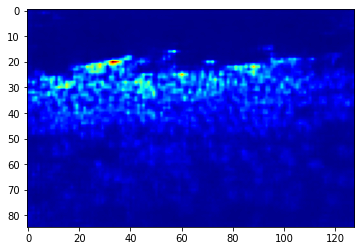

Original Count :  756


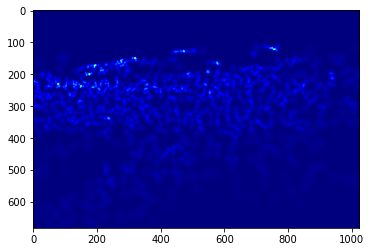

Original Image


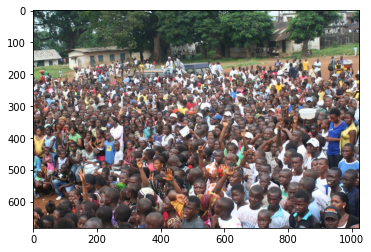

In [0]:
from matplotlib import cm as c
img = transform(Image.open('/content/drive/My Drive/cnn-cc/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_14.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/content/drive/My Drive/cnn-cc/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/ground-truth/IMG_14.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/drive/My Drive/cnn-cc/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/test_data/images/IMG_14.jpg'))
plt.show()
